# Likes❤️ clfsn with spotify data 🎼🎵🎵

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
playlist=pd.read_csv(r'C:/Users/Srujith Reddy/OneDrive/Desktop/DataSets/spofifydata.csv')
playlist.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
playlist = playlist.loc[:, ~playlist.columns.str.contains('^Unnamed')]
playlist.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:
playlist.info

<bound method DataFrame.info of       acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0          0.01020         0.833       204600   0.434          0.021900    2   
1          0.19900         0.743       326933   0.359          0.006110    1   
2          0.03440         0.838       185707   0.412          0.000234    2   
3          0.60400         0.494       199413   0.338          0.510000    5   
4          0.18000         0.678       392893   0.561          0.512000    5   
...            ...           ...          ...     ...               ...  ...   
2012       0.00106         0.584       274404   0.932          0.002690    1   
2013       0.08770         0.894       182182   0.892          0.001670    1   
2014       0.00857         0.637       207200   0.935          0.003990    0   
2015       0.00164         0.557       185600   0.992          0.677000    1   
2016       0.00281         0.446       204520   0.915          0.000039    9   

      l

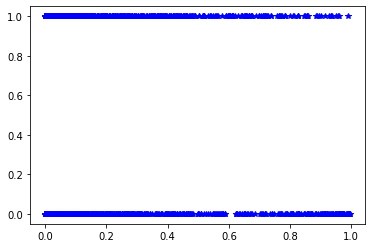

In [6]:
x=playlist['acousticness'].to_numpy()
y=playlist['target'].to_numpy()
plt.plot(x,y,'b*')

In [7]:
playlist['target'].value_counts()

1    1020
0     997
Name: target, dtype: int64

# Seperating categorical and numerical data

In [8]:
cat_cols=playlist.select_dtypes(exclude="number").columns
cat_cols
num_cols=playlist.select_dtypes(include="number").columns
num_cols

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target'],
      dtype='object')

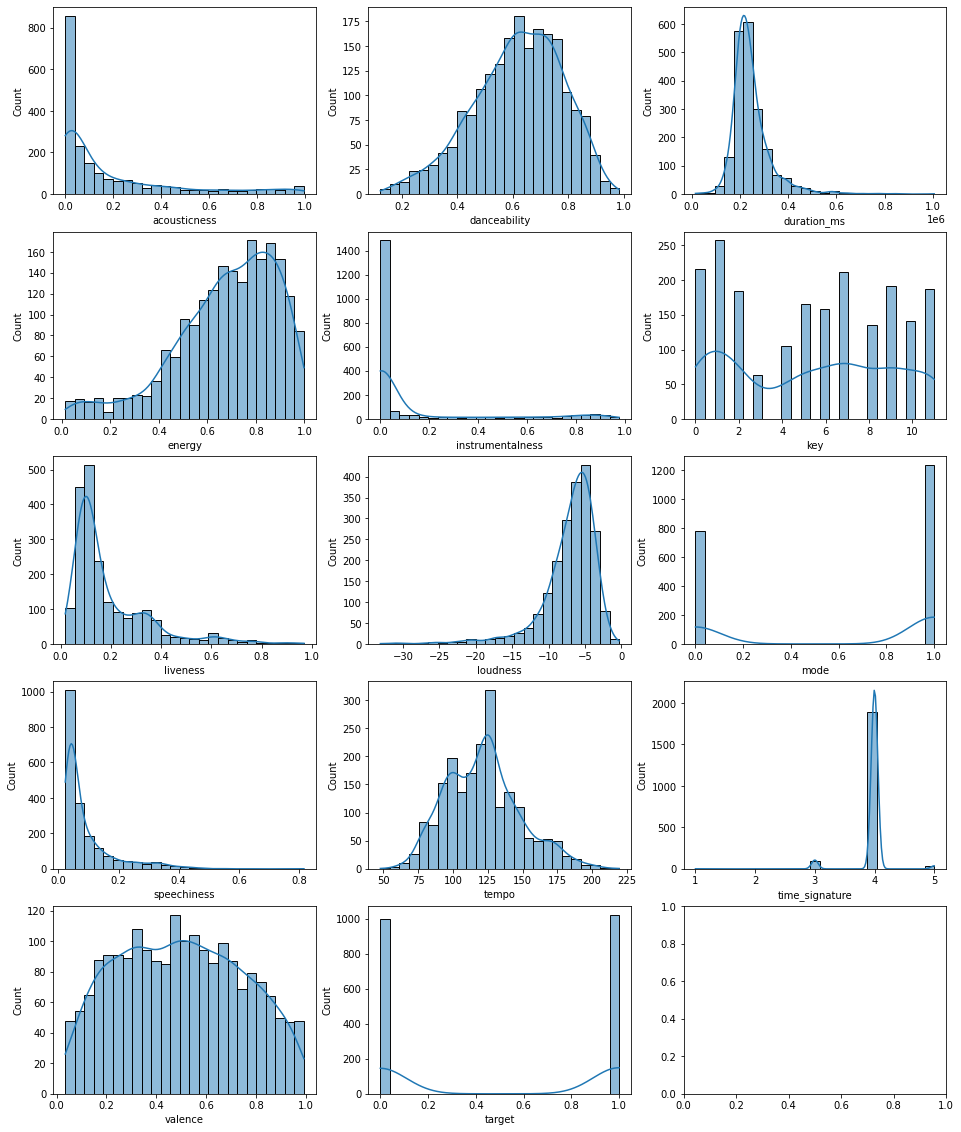

In [9]:
sns.set_palette('tab10')
fig,axes=plt.subplots(5,3,figsize=(16,20))
axes=axes.flatten()
ax_no=0
for col in num_cols:
    sns.histplot(data=playlist,x=col,bins=25,kde=True,ax=axes[ax_no])
    ax_no+=1
plt.show()

In [10]:
continuous_cols=['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','tempo','valence','speechiness']
discrete_cols=['key','mode','time_signature','target']

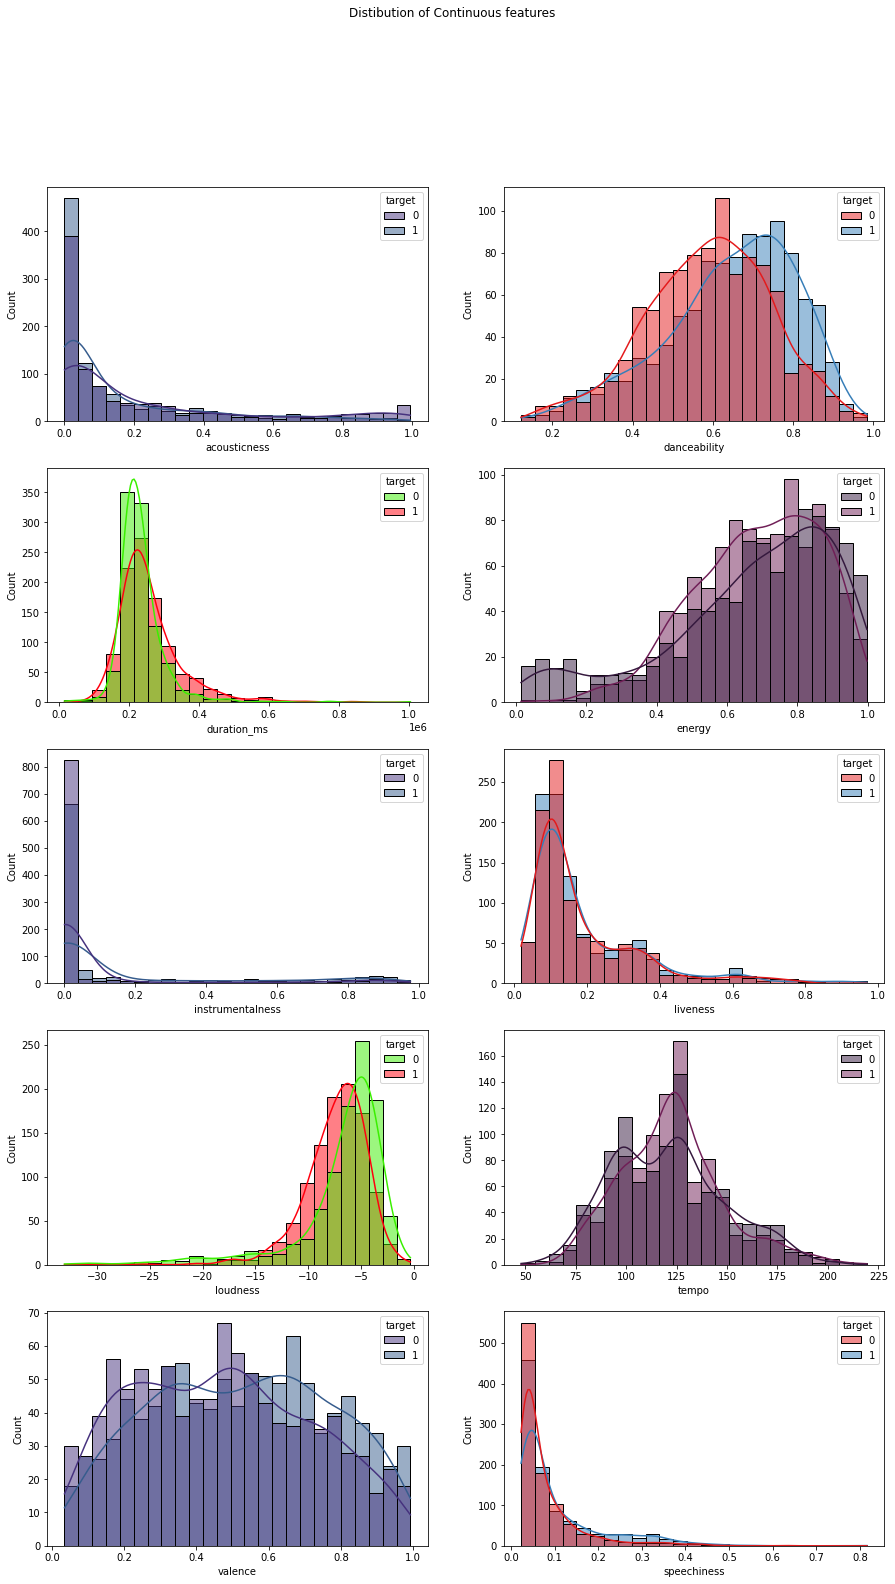

In [11]:
fig,axes=plt.subplots(5,2,figsize=(15,25))
palettes=['viridis','Set1','prism','rocket']
axes=axes.flatten()
ax_no=0
for col in continuous_cols:
    sns.set_palette(palettes[ax_no%4])
    sns.histplot(data=playlist,x=col,hue='target',bins=25,kde=True,ax=axes[ax_no])
    ax_no+=1
fig.suptitle("Distibution of Continuous features")
plt.show()


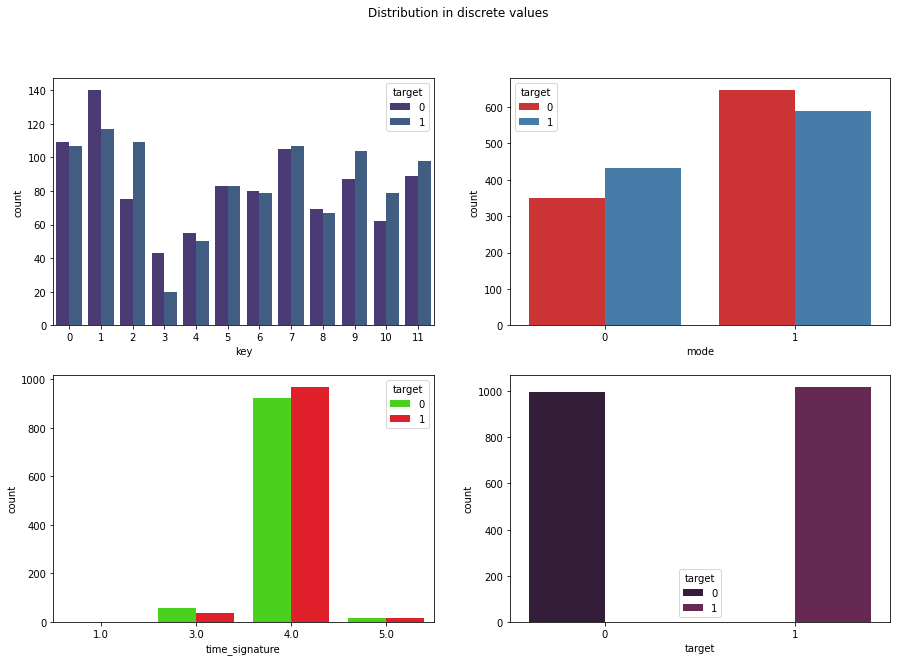

In [12]:
# Visualisation for discreted data
fig,axes=plt.subplots(2,2,figsize=(15,10))
palettes=['viridis','Set1','prism','rocket']
axes=axes.flatten()
ax_no=0
for col in discrete_cols:
    sns.set_palette(palettes[ax_no%4])
    sns.countplot(data=playlist,x=col,hue='target',ax=axes[ax_no])
    ax_no+=1
fig.suptitle("Distribution in discrete values")
plt.show()
    

### Finding Correlations

Text(0.5, 1.0, 'Negative correlations')

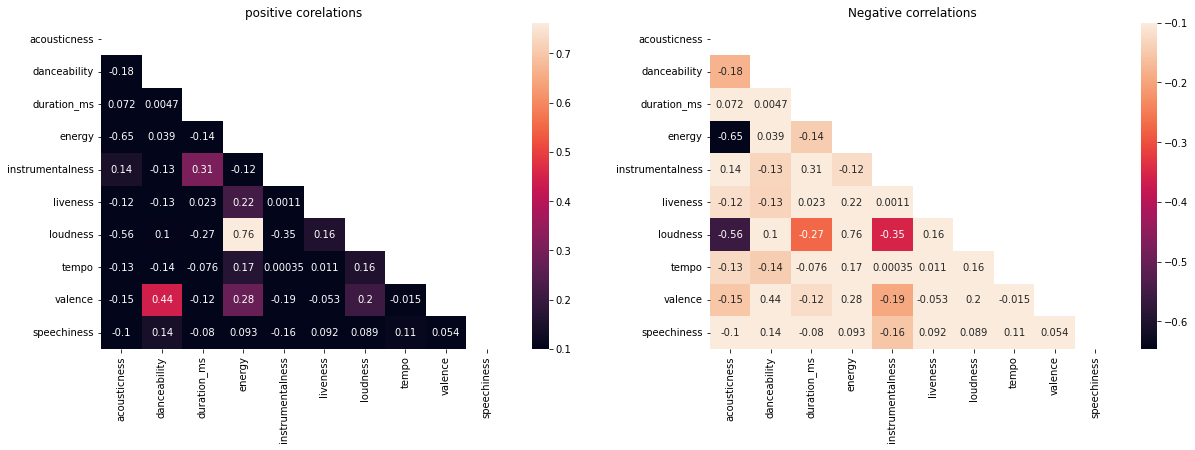

In [13]:
fig,axes=plt.subplots(1,2,figsize=(20,6))
corr=playlist[continuous_cols].corr()
mask=np.triu(np.ones_like(corr))
sns.heatmap(data=corr, annot=True,mask=mask,ax=axes[0],vmin=0.1) #positive relationships.
axes[0].set_title('positive corelations')
sns.heatmap(data= corr, annot=True, cmap ='rocket',mask=mask,ax = axes[1], vmax=-0.1) # max becomes -0.1, so we get negative relationships
axes[1].set_title('Negative correlations')


## correlations analysis

<AxesSubplot:xlabel='danceability', ylabel='valence'>

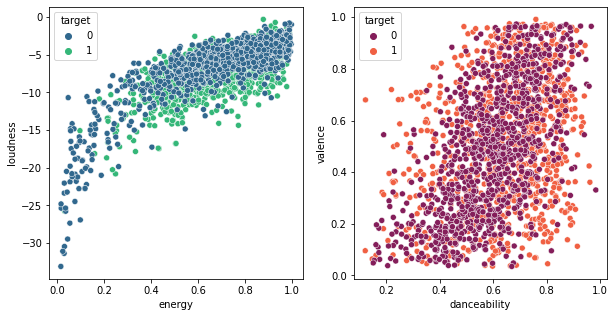

In [14]:
# by looking at the corr matrix we find that (energy X loudness) and (danceability X valence has +ve relation)
fig,axes=plt.subplots(1,2,figsize=(10,5))
axes=axes.flatten()
palettes=['viridis','rocket']
sns.scatterplot(data=playlist,x='energy',y='loudness',ax=axes[0],hue='target',palette=palettes[0])
sns.scatterplot(data=playlist,x='danceability',y='valence',ax=axes[1],hue='target',palette=palettes[1])

Text(0.5, 0.98, 'Correlation Analysis')

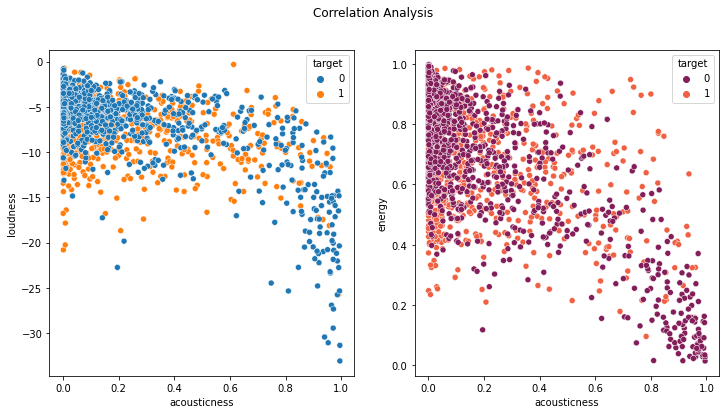

In [15]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
axes = axes.flatten()
palettes = ['tab10', 'rocket']
sns.scatterplot(data= playlist, x= 'acousticness', y= 'loudness', ax = axes[0], hue ='target', palette=palettes[0])
sns.scatterplot(data= playlist, x= 'acousticness', y= 'energy', ax = axes[1], hue ='target',palette=palettes[1])
fig.suptitle('Correlation Analysis')

### Dealing with text data

<AxesSubplot:>

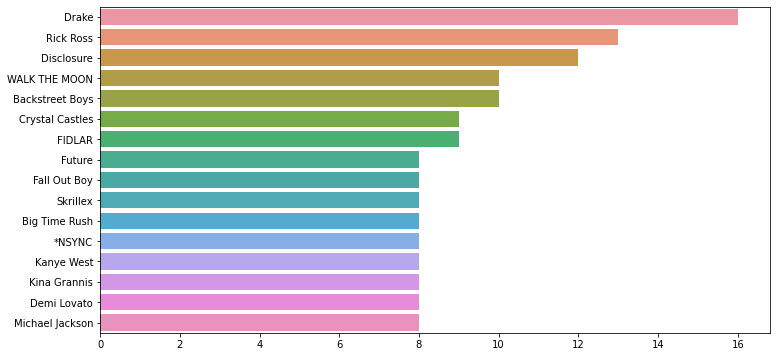

In [16]:
fig,axes=plt.subplots(1,1,figsize=(12,6))
singer_songs=playlist['artist'].value_counts()
sns.barplot(x=singer_songs[:16].values,y=singer_songs[:16].index,ax=axes)


#### Train Test Data

In [17]:
y=playlist['target']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(playlist,y,test_size=0.2,random_state=42)
X_test.drop('target',axis=1,inplace=True)

In [18]:
X_train.drop('song_title', axis=1, inplace = True)
X_test.drop('song_title', axis=1, inplace = True)
X_train.drop('target', axis=1, inplace = True)

# pipelines

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


categorical_pipeline=Pipeline(
    steps=[
        ("impute" ,SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore",sparse=False))
     ]
)

numerical_pipeline=Pipeline(
    steps=[
        
        ("impute", SimpleImputer(strategy="mean")),
        ("scale", StandardScaler())
    ]
)


cat_cols = X_train.select_dtypes(exclude="number").columns
num_cols = X_train.select_dtypes(include="number").columns

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numerical_pipeline, num_cols),
        ("categorical", categorical_pipeline, cat_cols),
    ]
    
)

In [20]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from xgboost import XGBClassifier

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

model = XGBClassifier()
model.fit(X_train,y_train)
xgb_classifier = model.predict(X_test)
auc_score_xgb = accuracy_score(y_test, xgb_classifier)
print(auc_score_xgb)

0.7896039603960396


Text(0.5, 1.0, 'Confusion matrix for XGB')

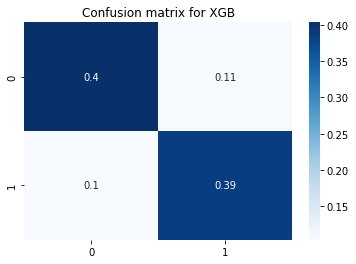

In [ ]:
fig, ax = plt.subplots()
cm = confusion_matrix(y_test,xgb_classifier, normalize='all')
sns.heatmap(data= cm, cmap='Blues', annot=True, ax = ax)
ax.set_title('Confusion matrix for XGB')

# Pickling the file for deployment

In [ ]:
import pickle
pickle.dump(xgb_classifier,open('classify.pkl','wb'))

In [ ]:
pickled_model=pickle.load(open('classify.pkl','rb'))

In [33]:
(X_train[0].reshape(1,-1)).shape


(1, 1138)